# Análise e Modelagem de Dados Aerodinâmicos usando Regressão Linear

In [1]:
!pip install ucimlrepo numpy

Este conjunto de dados se refere a um estudo experimental sobre características aerodinâmicas de uma asa, como o ângulo de ataque, o comprimento da corda da asa e a velocidade do fluxo de ar, juntamente com a pressão sonora escalada gerada por essas características. Em termos simples, ele investiga como diferentes aspectos do design de uma asa afetam o nível de ruído produzido. Esses dados podem ser usados para entender melhor a relação entre as características aerodinâmicas e o ruído gerado, o que pode ser útil no projeto de asas mais silenciosas e eficientes.

Importar dependências.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

from scipy.linalg import qr, solve_triangular

Ler base de dados.

In [3]:
airfoil_self_noise = fetch_ucirepo(id=291) 
  
x = airfoil_self_noise.data.features 
y = airfoil_self_noise.data.targets 

Armazenar itens do banco de dados em arrays NumPy.

In [4]:
x_numpy = np.array(x)
y_numpy = np.array(y)

Mostrar os nomes das características do banco de dados.

In [5]:
airfoil_self_noise.variables

,name,role,type,demographic,description,units,missing_values
0,frequency,Feature,Integer,None,None,Hz,no
1,attack-angle,Feature,Binary,None,None,deg,no
2,chord-length,Feature,Continuous,None,None,m,no
3,free-stream-velocity,Feature,Continuous,None,None,m/s,no
4,suction-side-displacement-thickness,Feature,Continuous,None,None,m,no
5,scaled-sound-pressure,Target,Continuous,None,None,dB,no


- **Frequency (Frequência)**: refere-se à frequência associada ao experimento ou ao fenômeno aerodinâmico em estudo.
- **Attack Angle (Ângulo de Ataque)**: é o ângulo entre a direção do vento incidente e o eixo de referência da asa ou objeto aerodinâmico.
- **Chord Length (Comprimento da Corda)**: é o comprimento da linha reta que conecta a borda de ataque à borda de fuga de uma asa, medido ao longo da linha do eixo de referência.
- **Free-stream Velocity (Velocidade do Fluxo Livre)**: é a velocidade do ar não perturbado longe do corpo ou objeto aerodinâmico.
- **Suction-side Displacement Thickness (Espessura de Deslocamento do Lado de Sucção)**: é a espessura da camada limite do lado de sucção da asa, medida perpendicularmente à superfície da asa.

Imprimir as primeiras linhas do banco de dados.

In [6]:
x.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


Dividir os dados em conjunto de treinamento e teste na proporção de 70/30.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_numpy, y_numpy, test_size=0.3, random_state=42, shuffle=True)

Normalizar os dados usando min-max (na normalização min-max, os dados são dimensionados para um intervalo específico, geralmente entre 0 e 1).

`fit_transform` é usado durante o treinamento do modelo para ajustar o transformador e transformar os dados de treinamento, enquanto `transform` é usado durante o teste para aplicar a mesma transformação aos dados de teste que foram aprendidos a partir dos dados de treinamento.

In [ ]:
scaler = MinMaxScaler()

x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

Alternativamente é possível usar o scaler padrão.

Na padronização, os dados são transformados para ter média zero e desvio padrão um.

In [8]:
scaler = StandardScaler()

x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

Construir a matriz A com uma coluna de 1s na frente.

In [9]:
x_train_with_bias = np.c_[np.ones((x_train_normalized.shape[0], 1)), x_train_normalized]
x_train_with_bias

array([[ 1.        , -0.13997206,  1.8346947 , -1.20745781, -0.75162403,
         0.4782222 ],
       [ 1.        , -0.13997206,  0.00769339, -0.39458732,  1.28129287,
        -0.47577913],
       [ 1.        ,  0.31759321, -1.13631678, -0.39458732, -0.75162403,
        -0.73039691],
       ...,
       [ 1.        , -0.71040343,  0.77605842, -0.93650098, -0.75162403,
         0.31156351],
       [ 1.        , -0.80649214,  0.96388099, -0.39458732, -1.25825001,
         2.3693166 ],
       [ 1.        ,  0.62263673,  1.0321801 , -1.20745781,  1.28129287,
         0.09165811]])

In [10]:
b_train = y_train.reshape(-1, 1)
b_train

array([[124.154],
       [131.458],
       [127.801],
       ...,
       [133.13 ],
       [124.717],
       [128.978]])

Verificar o posto máximo da matriz A.

O posto máximo de uma matriz é o maior número de linhas ou colunas linearmente independentes que podem ser escolhidas na matriz. 

In [11]:
max_rank = np.linalg.matrix_rank(x_train_with_bias)
max_rank

6

Calcular decomposição QR e decomposição QR reduzida.

In [12]:
Q, R = qr(x_train_with_bias, mode='economic')

coefficients = solve_triangular(R, np.dot(Q.T, b_train))

Estimar variáveis dependentes.

In [13]:
x_test_with_bias = np.c_[np.ones((x_test_normalized.shape[0], 1)), x_test_normalized]

y_pred = np.dot(x_test_with_bias, coefficients)
y_pred[:5]

array([[124.06649005],
       [119.46413909],
       [120.33254103],
       [129.60886761],
       [129.78612472]])

Calcular a Raiz Quadrada do Erro Quadrático Médio (RMSE).

O RMSE mede a dispersão dos resíduos (diferenças entre os valores reais e os valores previstos) em relação à linha de melhor ajuste (ou seja, a reta que minimiza a soma dos quadrados dos resíduos). Quanto menor o valor do RMSE, melhor é o ajuste do modelo aos dados, indicando que o modelo é capaz de prever os valores reais com mais precisão.

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

4.8670173915886314

Desenhar gráfico Valores Reais x Valores Estimados.

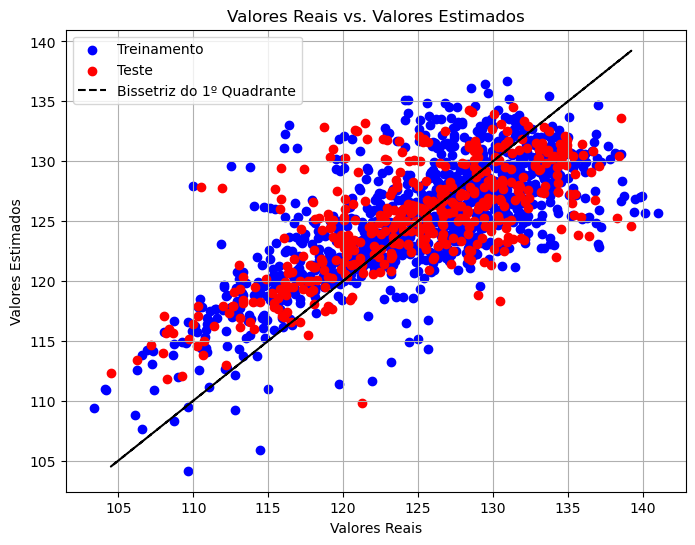

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, np.dot(x_train_with_bias, coefficients), color='blue', label='Treinamento')
plt.scatter(y_test, y_pred, color='red', label='Teste')
plt.plot(y_test, y_test, linestyle='--', color='black', label='Bissetriz do 1º Quadrante')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Estimados')
plt.title('Valores Reais vs. Valores Estimados')
plt.legend()
plt.grid(True)
plt.show()